# Load in and organize the data frames

In [85]:
#add packages
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pyreadr
from sklearn.decomposition import PCA

In [86]:
# read csv into array
result = loadmat('pone.0197134.s005.mat')

Xfilt = result['Xfilt']
#remove nested data (MATLAB Structure)
nested = Xfilt[0][0]
data = nested[0]

#build features into columns
ID = pd.DataFrame(nested[1],columns=["Person No", "Analysis Day"])
numdate = pd.DataFrame(nested[2],columns=["num date"])
setting = pd.DataFrame(nested[3],columns=["setting"])
skin = pd.DataFrame(nested[4],columns=["skin depth"])
yref=pd.DataFrame(nested[5],columns=["Blood Glucose Level"])

axis = nested[6]
#create normalized axis of data
data_pd = pd.DataFrame(data*(1/axis))

#create total dataframe
df = pd.concat([ID, numdate, setting, skin, data_pd], axis=1, join='inner')
df.head()


,Person No,Analysis Day,num date,setting,skin depth,0,1,2,3,4,...,930,931,932,933,934,935,936,937,938,939
0,16,0,350.434097,250,170,93.099962,92.481593,92.028317,91.488052,90.890810,...,5.760499,5.722661,5.717672,5.696312,5.649615,5.608086,5.598972,5.569059,5.523360,5.500901
1,16,0,350.438079,250,170,80.016572,79.450249,79.055381,78.517258,77.921770,...,4.576366,4.559388,4.540691,4.518371,4.502473,4.474175,4.454401,4.418252,4.391482,4.380370
2,16,1,351.276285,250,170,89.704920,89.086513,88.683207,88.188938,87.592824,...,5.376595,5.349344,5.337310,5.314715,5.279771,5.266575,5.238809,5.198213,5.155455,5.151816
3,16,1,351.286238,250,170,82.713736,82.059888,81.605776,81.204001,80.651887,...,4.886053,4.866487,4.865145,4.835927,4.810635,4.777480,4.758903,4.729842,4.685953,4.676358
4,16,1,351.723738,250,170,95.022817,94.356762,93.950372,93.458364,92.835402,...,5.792040,5.766719,5.745401,5.718345,5.689691,5.642981,5.627188,5.603679,5.540202,5.560164


In [87]:
#investigate y data values
y_data = pd.DataFrame(yref)
y_data.head()

,Blood Glucose Level
0,14.400000
1,14.100000
2,7.070588
3,8.300000
4,12.700000


In [65]:
#describe the label data
print(y_data.describe())

       Blood Glucose Level
count          4341.000000
mean              9.642683
std               4.159039
min               1.800000
25%               6.500000
50%               8.833333
75%              12.100000
max              30.000000


In [75]:
#investigate the rows of the data
firstrow = data_pd.iloc[1]
secondrow = data_pd.iloc[250]
thirdrow = data_pd.iloc[500]
fourthrow = data_pd.iloc[750]
fifthrow = data_pd.iloc[1000]

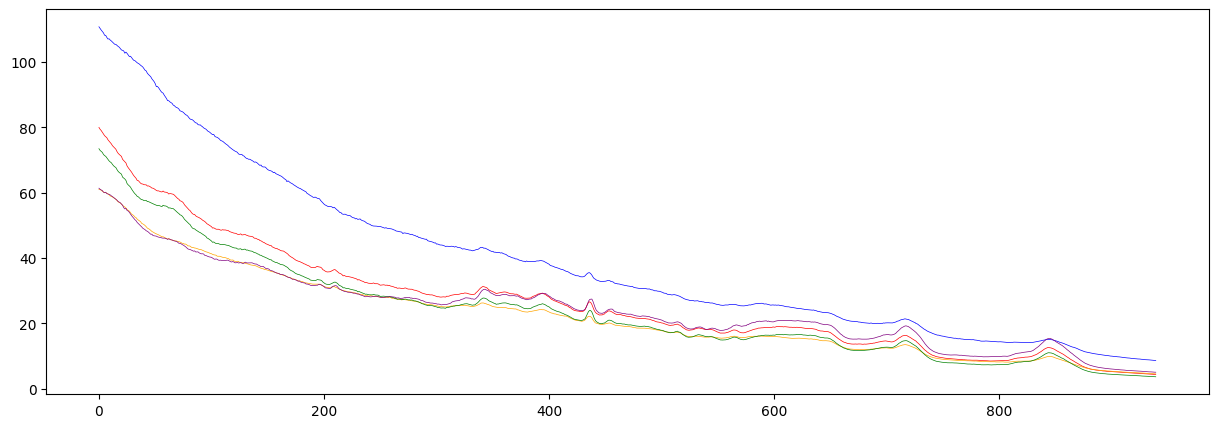

In [88]:
#plot different rows of data to see their distribution
x=range(940)
plt.figure(figsize=(15, 5))
plt.plot(x, firstrow, color="red", linewidth=0.5)
plt.plot(x, secondrow, color="blue", linewidth=0.5)
plt.plot(x, thirdrow, color="orange", linewidth=0.5)
plt.plot(x, fourthrow, color="green", linewidth=0.5)
plt.plot(x, fifthrow, color="purple", linewidth=0.5)

# Create Training and testing set

In [77]:
#test and train split 30% to train 70% to test
x_train, x_test, y_train, y_test = train_test_split(data_pd, y_data, test_size=0.3)

print(x_train.shape, y_train.shape)

y_test.value_counts()

(3038, 940) (3038, 1)


Blood Glucose Level
5.000000               12
10.100000               5
5.500000                5
8.800000                4
8.800000                4
                       ..
7.566667                1
7.572727                1
7.633333                1
7.660000                1
28.798305               1
Length: 1058, dtype: int64

# Do PCA

In [89]:
#build PCA model of 3 components
pca = PCA(n_components=3)
pca_features = pca.fit_transform(x_train)
print('Shape before PCA: ', x_train.shape)
print('Shape after PCA: ', pca_features.shape)
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])
pca_test = pca.fit_transform(x_test)
test_DF = pd.DataFrame(data=pca_test, columns=['PC1', 'PC2', 'PC3'])



Shape before PCA:  (3038, 940)
Shape after PCA:  (3038, 3)


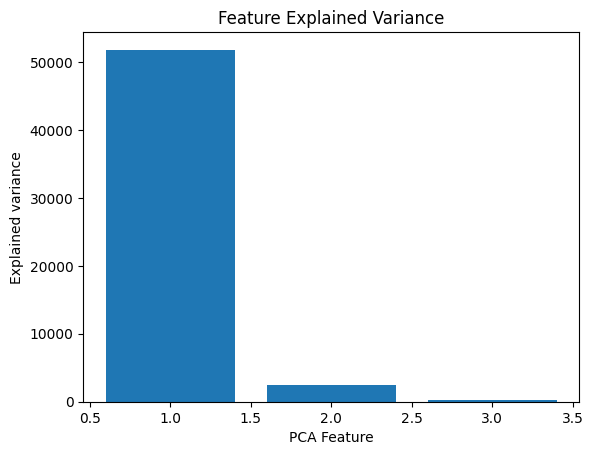

In [90]:
#plot PCA columns varience
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

# Build Models Normal Dataset

In [70]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import neural_network
from sklearn.metrics import classification_report, confusion_matrix



In [97]:
#building and training linear regression model (OLS)
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

In [98]:
#testing data results on model
y_pred = reg.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

11.863881610701299
0.3062309602553691


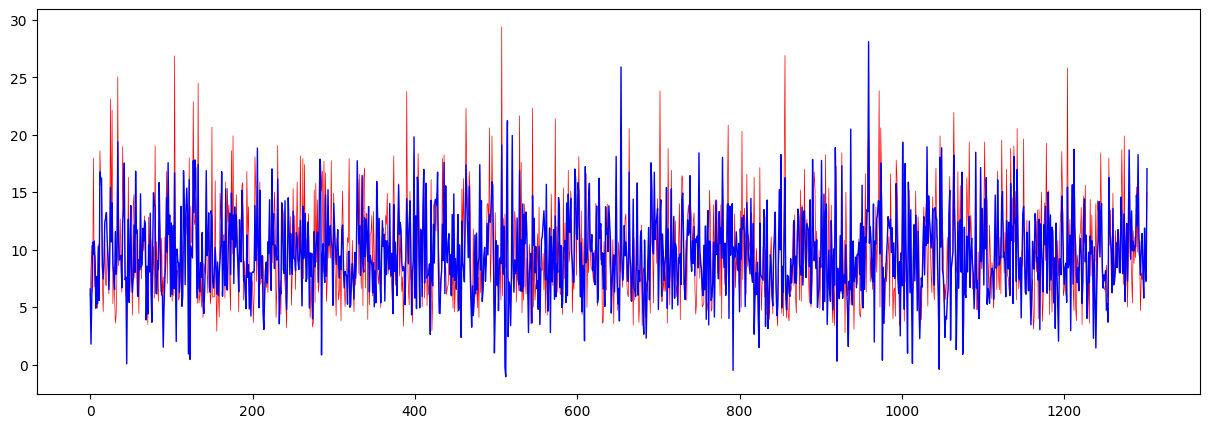

In [14]:

#plotting PLS regression
x=range(1303) #regularizing the x axis
plt.figure(figsize=(15, 5))
plt.plot(x, y_test, color="red", linewidth=0.5)
plt.plot(y_pred, color="blue", linewidth=1)


In [34]:
#fixing some Y value shapes for system errors
print(y_train.shape)
y_train_rav = np.ravel(y_train)
print(y_train_rav.shape)


(3038, 1)
(3038,)


# MLP TEST

In [51]:
reg1 = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', solver='lbfgs',max_iter=50000)
#{'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 400, 'solver': 'lbfgs'} Optimal grid search

In [15]:
#Create hyper parameter lists for gridsearch
reg1 = MLPRegressor()
parameters = {"hidden_layer_sizes": [(1,),(50,),(100,),(200,),(200,50)],
              "activation": ["identity", "logistic", "tanh", "relu"],
              "solver": ["lbfgs", "sgd", "adam"],
              "max_iter": [100,200,300,400]}



In [52]:
#Training the model on the training data
reg1.fit(x_train, y_train_rav)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='logistic', max_iter=50000, solver='lbfgs')

In [22]:
#Create grid search
grid_mlp= GridSearchCV(estimator=reg1, param_grid = parameters, scoring = "neg_mean_squared_error", cv = 5, n_jobs=-1)

In [23]:
grid_mlp.fit(x_train, y_train_rav)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:132: RuntimeWarning: invalid value encountered in add
  activations[i + 1] += self.intercepts_[i]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:132: RuntimeWarning: invalid value encountered in add
  activations[i + 1] += self.intercepts_[i]
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versio

GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(1,), (50,), (100,), (200,),
                                                (200, 50)],
                         'max_iter': [100, 200, 300, 400],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='neg_mean_squared_error')

In [24]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_mlp.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_mlp.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_mlp.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 MLPRegressor(activation='logistic', max_iter=400, solver='lbfgs')

 The best score across ALL searched params:
 -15.377645637765943

 The best parameters across ALL searched params:
 {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 400, 'solver': 'lbfgs'}


In [57]:
#printing out the MLP regression evaluation metrics
y_pred1 = reg1.predict(x_test)
print(mean_squared_error(y_test,y_pred1))
print(r2_score(y_test,y_pred1))



10.303665274535726
0.406975889369375


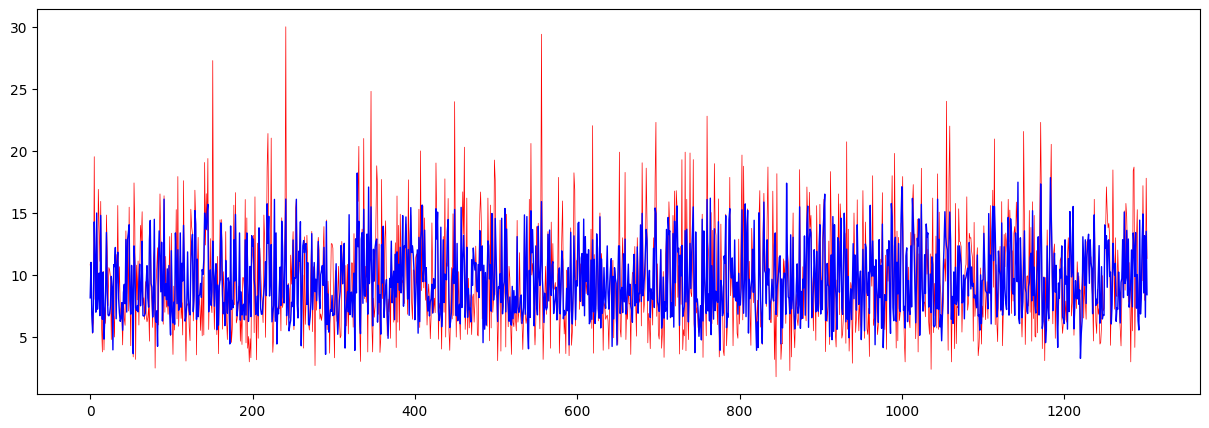

In [58]:
#Plotting the testing data MLP Regression
x=range(1303) # regularizing the axis
plt.figure(figsize=(15, 5))
plt.plot(x, y_test, color="red", linewidth=0.5)
plt.plot(y_pred1, color="blue", linewidth=1)

In [59]:
#printing out the predicted regression evaluation metrics
y_pred1 = reg1.predict(x_train)
print(mean_squared_error(y_train,y_pred1))
print(r2_score(y_train,y_pred1))


8.199365958566043
0.5249154438111236


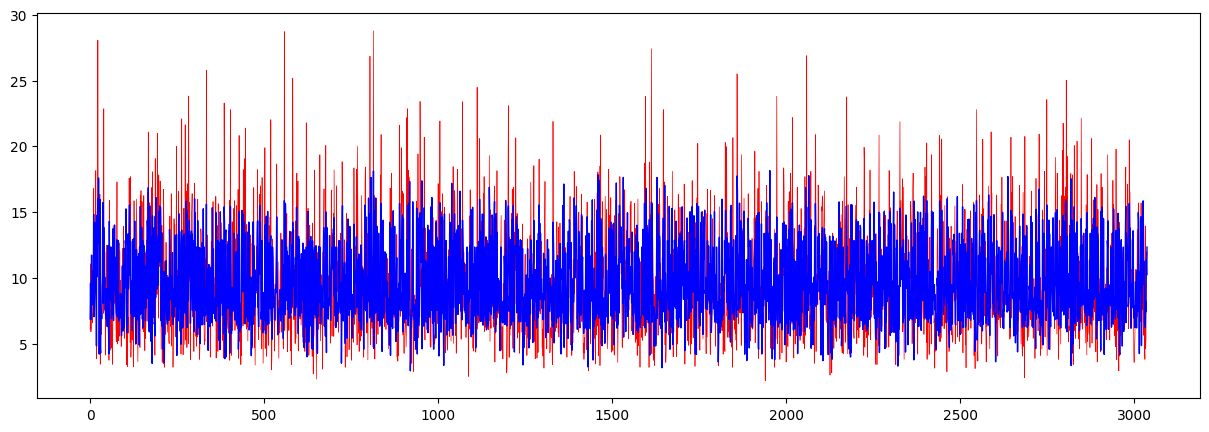

In [61]:
#Plotting the trainign data MLP Regression 
x=range(3038) #regularizing the axis
plt.figure(figsize=(15, 5))
plt.plot(x, y_train, color="red", linewidth=0.5)
plt.plot(y_pred1, color="blue", linewidth=1)

# Binary Classification of regression

In [112]:
#makign alternative datasets to edit to create the binary classification
y_test_DF = y_test.copy()
y_train_df = y_train.copy()
y_pred_DF = pd.DataFrame(y_pred1,columns=["Blood Glucose Level"])

In [114]:
#Classifying the training data and predicted regression into threashold values
y_pred_DF["Blood Glucose Level"] = np.where((y_pred_DF["Blood Glucose Level"] <= 8) & (y_pred_DF["Blood Glucose Level"] >= 5), 0, 1)
y_train_df["Blood Glucose Level"] = np.where((y_train_df["Blood Glucose Level"] <= 8) & (y_train_df["Blood Glucose Level"] >= 5), 0, 1)

In [115]:
#Evaluating the binary classificaiton using a confusion matrix and accuracy scores SKLearn
confmat=confusion_matrix(y_train_df,y_pred_DF)
print(confmat)
eval=classification_report(y_train_df,y_pred_DF)
print(eval)

[[ 315  643]
 [ 683 1397]]
              precision    recall  f1-score   support

           0       0.32      0.33      0.32       958
           1       0.68      0.67      0.68      2080

    accuracy                           0.56      3038
   macro avg       0.50      0.50      0.50      3038
weighted avg       0.57      0.56      0.57      3038



In [116]:
#Classifying the test data and predicted regression into threashold values
y_pred1 = reg1.predict(x_test)
y_pred_DF = pd.DataFrame(y_pred1,columns=["Blood Glucose Level"])
y_pred_DF["Blood Glucose Level"] = np.where((y_pred_DF["Blood Glucose Level"] <= 8) & (y_pred_DF["Blood Glucose Level"] >= 5), 0, 1)
y_test_DF["Blood Glucose Level"] = np.where((y_test_DF["Blood Glucose Level"] <= 8) & (y_test_DF["Blood Glucose Level"] >= 5), 0, 1)

In [117]:
#Evaluating the binary classificaiton using a confusion matrix and accuracy scores SKLearn
confmat=confusion_matrix(y_test_DF,y_pred_DF)
print(confmat)
eval=classification_report(y_test_DF,y_pred_DF)
print(eval)

[[231 185]
 [228 659]]
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       416
           1       0.78      0.74      0.76       887

    accuracy                           0.68      1303
   macro avg       0.64      0.65      0.64      1303
weighted avg       0.69      0.68      0.69      1303



# Splitting into skin depth ranges

In [152]:
df1 = pd.concat([setting, skin, data_pd, yref], axis=1, join='inner')
df2 = pd.concat([setting, skin, data_pd, yref], axis=1, join='inner')
df3 = pd.concat([setting, skin, data_pd, yref], axis=1, join='inner')

x_data1 = df1[(df1['setting'] < 200) & (df1['setting'] > 140)]
x_data2 = df2[(df2['setting'] < 270) & (df2['setting'] > 240)]
x_data3 = df3[(df3['setting'] < 320) & (df3['setting'] > 280)]

yref1 = pd.DataFrame(x_data1["Blood Glucose Level"],columns=["Blood Glucose Level"])
yref2 = pd.DataFrame(x_data2["Blood Glucose Level"],columns=["Blood Glucose Level"])
yref3 = pd.DataFrame(x_data3["Blood Glucose Level"],columns=["Blood Glucose Level"])

x_data1= x_data1.drop("Blood Glucose Level", axis=1)
x_data2=x_data2.drop("Blood Glucose Level", axis=1)
x_data3=x_data3.drop("Blood Glucose Level", axis=1)

x_data1.head()

,setting,skin depth,0,1,2,3,4,5,6,7,...,930,931,932,933,934,935,936,937,938,939
1157,170,190,79.386760,79.867441,79.416928,79.132174,78.814594,78.446976,78.464689,78.281646,...,6.813878,6.797661,6.765893,6.726138,6.692173,6.663904,6.634417,6.619591,6.590205,6.560270
1158,170,190,91.490553,91.467546,91.060724,90.784554,90.455524,90.056186,90.075888,89.905899,...,8.462521,8.424652,8.385507,8.347480,8.307924,8.274632,8.235825,8.205270,8.183039,8.142531
1159,170,190,93.093156,92.740077,92.256730,91.888821,91.515679,91.129942,91.102757,90.918194,...,8.471509,8.443055,8.399017,8.357837,8.321188,8.277951,8.241631,8.210490,8.181017,8.150826
1160,170,190,82.622042,83.175001,82.801854,82.470778,82.136134,81.801409,81.840880,81.662585,...,6.789991,6.777076,6.745200,6.705672,6.662564,6.636706,6.611669,6.588515,6.557974,6.526620
1161,170,190,81.906952,82.371635,81.996356,81.642188,81.295969,80.967367,81.029713,80.785797,...,6.887088,6.862874,6.831964,6.792116,6.756874,6.720125,6.692186,6.673148,6.636850,6.620058


# Splitting data into first 25 and last 5 days

In [93]:
#create new dataset with the days feature
df_test = pd.concat([ID, data_pd, yref], axis=1, join='inner')


In [105]:
#split the data into 25 and 5
first_25_x= df_test[(df_test['Analysis Day'] < 25)]
first_25_y= pd.DataFrame(first_25_x["Blood Glucose Level"],columns=["Blood Glucose Level"])
last_5_x= df_test[(df_test['Analysis Day'] >= 25)]
last_5_y= pd.DataFrame(last_5_x["Blood Glucose Level"],columns=["Blood Glucose Level"])
#drop the columns that are not useful for regression
first_25_x= first_25_x.drop("Blood Glucose Level", axis=1)
first_25_x= first_25_x.drop("Analysis Day", axis=1)
first_25_x= first_25_x.drop("Person No", axis=1)
last_5_x= last_5_x.drop("Blood Glucose Level", axis=1)
last_5_x= last_5_x.drop("Analysis Day", axis=1)
last_5_x= last_5_x.drop("Person No", axis=1)

In [106]:
#building and training linear regression model (OLS)
reg = linear_model.LinearRegression()
reg.fit(first_25_x, first_25_y)


LinearRegression()

In [107]:
#Test testing data
y_pred = reg.predict(last_5_x)
print(mean_squared_error(last_5_y,y_pred))
print(r2_score(last_5_y,y_pred))

15.764870998558107
0.1458029326461734


In [108]:
#Test training data
y_pred = reg.predict(first_25_x)
print(mean_squared_error(first_25_y,y_pred))
print(r2_score(first_25_y,y_pred))

4.284098936971263
0.7364699470740788
